<a href="https://colab.research.google.com/github/yous92/ML-Workshop/blob/main/2_Multiple_and_Polynomial_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple and Polynomial Linear Regression with Numpy






In [ ]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Polynomial Regression: 1 Variable $x_1$


## 1.1 Dataset

To develop a polynomial model from linear regression equations, you need to add polynomial degrees in the columns of the matrix $X$ and an equal number of rows in the vector $\theta$.

In this notebook, we will develop a polynomial of degree 2: $f(x) = ax^2 + bx + c$. To achieve this, you need to develop the following matrices:

$$
X = \begin{bmatrix}
x^{2 (1)} & x^{(1)} & 1 \\
... & ... & ... \\
x^{2 (m)} & x^{(m)} & 1
\end{bmatrix}
$$

$$
\theta = \begin{bmatrix}
a \\
b \\
c
\end{bmatrix}
$$

$$
y = \begin{bmatrix}
y^{(1)} \\
... \\
y^{(m)}
\end{bmatrix}
$$

*Note: The vector $y$ remains the same as in linear regression.*


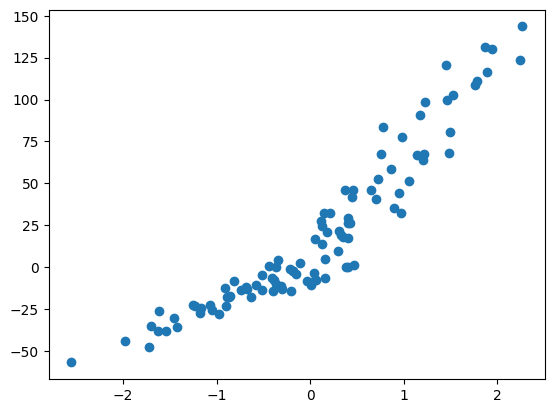

In [ ]:
np.random.seed(0)  # Allows for reproducibility of randomness

x, y = make_regression(n_samples=100, n_features=1, noise=10)  # Create a linear dataset (x, y)
y = y + abs(y / 2)  # Modify y values to make the dataset nonlinear

plt.scatter(x, y)  # Display the results. x on the x-axis and y on the y-axis
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-linear Dataset')
plt.show()


In [ ]:
# Verification of dimensions
print(x.shape)
print(y.shape)

# Reshape y
y = y.reshape(y.shape[0], 1)
print(y.shape)


(100, 1)
(100,)
(100, 1)


In [ ]:
# Creation of the matrix X, includes the bias
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))  # Add the x^2 vector to the left of the X matrix

print(X.shape)
print(X[:10])


(100, 3)
[[ 0.12927848 -0.35955316  1.        ]
 [ 0.95382381  0.97663904  1.        ]
 [ 0.1618788   0.40234164  1.        ]
 [ 0.66120688 -0.81314628  1.        ]
 [ 0.78816353 -0.88778575  1.        ]
 [ 0.19701457  0.44386323  1.        ]
 [ 0.95507205 -0.97727788  1.        ]
 [ 0.18346819  0.42833187  1.        ]
 [ 0.04337847  0.20827498  1.        ]
 [ 0.09706498 -0.31155253  1.        ]]


In [ ]:
# Initialization of the random theta vector with 3 elements (since X has three columns)
theta = np.random.randn(3, 1)
theta


array([[-0.63743703],
       [-0.39727181],
       [-0.13288058]])

## 1.2 Linear Model

We implement a model $F = X \cdot \theta$, then test the model to check for any bugs (good practice). Additionally, this helps to see what the initial model looks like, defined by the value of $\theta$.


In [ ]:
def model(X, theta):
    return X.dot(theta)

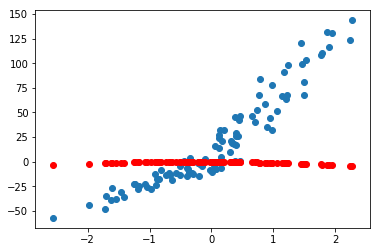

In [ ]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

## 1.3 Cost Function: Mean Squared Error

We measure the model's errors on the dataset \(X, y\) by implementing the Mean Squared Error (MSE).

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [ ]:
cost_function(X, y, theta)

1328.6654828872622

## 1.4 Gradients and Gradient Descent

We implement the gradient formula for **MSE**:
$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Then, we use this function in the gradient descent update:
$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$


In [ ]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)  # Create an array to store the cost evolution

    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)  # Update the theta parameter (gradient descent formula)
        cost_history[i] = cost_function(X, y, theta)  # Record the cost value at iteration i in cost_history[i]

    return theta, cost_history


## 1.5 Training Phase
We define a number of iterations and a learning rate $\alpha$, and then we're ready to go!

Once the model is trained, we observe the results with respect to our dataset.

In [ ]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [ ]:
theta_final  # These are the parameters of the model once the training is complete


array([[ 8.60077615],
       [42.23116732],
       [ 8.18143081]])

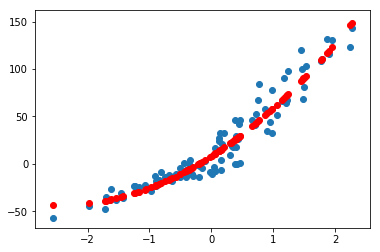

In [ ]:
# Create a prediction vector containing predictions from the final model
predictions = model(X, theta_final)

# Display the prediction results (in red) compared to the dataset (in blue)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')


## 1.6 Learning Curves

To verify if our Gradient Descent algorithm worked correctly, we observe the evolution of the cost function across iterations. We expect to see a curve that decreases with each iteration until it stabilizes at a minimal level (close to zero). If the curve does not follow this pattern, then the **learning_rate** might be too high, and a smaller learning rate should be considered.


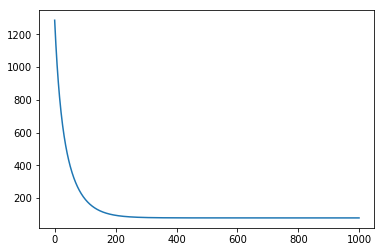

In [ ]:
plt.plot(range(n_iterations), cost_history)

## 1.7 Final Evaluation

To evaluate the actual performance of our model with a popular metric (for your boss, client, or colleagues), we can use the **coefficient of determination**, also known as $R^2$. This metric comes from the least squares method. The closer the result is to 1, the better your model.


In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
coef_determination(y, predictions)

0.9287186469389942

# 2. Multiple Variable Regression

This is where things start to get really interesting when we incorporate multiple variables $x_1, x_2, x_3, etc.$ into our model. It is also at this point that people might start talking about *artificial intelligence*, because it is challenging for a human to visualize a model in higher dimensions (we only operate in a 3D space). We then think that the machine, being able to represent these spaces and find the best model (with gradient descent), is intelligent, when in fact it's just mathematics.

## 2.1 Dataset

In this notebook, we will create a model with 2 variables $x_1, x_2$. To do this, we simply need to inject the different variables $x_1, x_2$ (the **features**) into the matrix $X$, and create the vector $\theta$ that matches with:

$X = \begin{bmatrix} x^{(1)}_1 & x^{(1)}_2 & 1 \\ ... & ... & ... \\ x^{(m)}_1 & x^{(m)}_2 & 1 \end{bmatrix}$

$\theta = \begin{bmatrix} a\\b\\c \end{bmatrix}$

$y = \begin{bmatrix} y^{(1)}\\...\\y^{(m)} \end{bmatrix}$

*Note: The vector $y$ remains the same as in linear regression.*


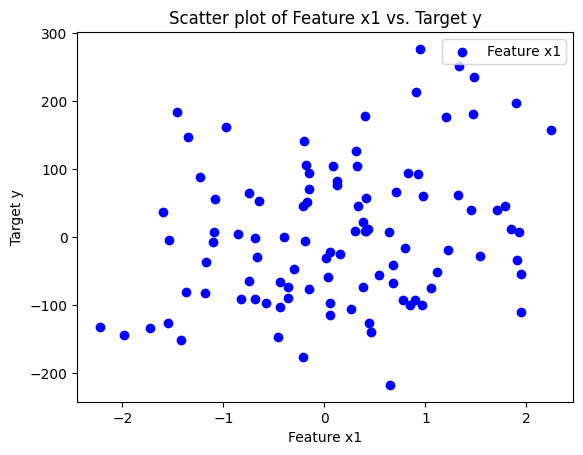

In [ ]:
np.random.seed(0)  # For reproducibility

# Generate a dataset with 100 samples and 2 features
x, y = make_regression(n_samples=100, n_features=2, noise=10)

# Visualize the data
plt.scatter(x[:, 0], y, color='blue', label='Feature x1')
plt.xlabel('Feature x1')
plt.ylabel('Target y')
plt.title('Scatter plot of Feature x1 vs. Target y')
plt.legend()
plt.show()

This dataset contains only 2 variables $x_1 and x_2$, which allows us to visualize it in a 3D space. As you can see, this model can be represented by a surface. Note that this surface is flat because make_regression returns linear data. To create a non-flat surface, you would need to modify the values of y as we did at the beginning of this notebook. (We will not do that here.)

In [ ]:
# Verification of dimensions
print(x.shape)
print(y.shape)

# Reshaping y
y = y.reshape(y.shape[0], 1)
print(y.shape)


(100, 2)
(100,)
(100, 1)


In [ ]:
# Creating the matrix X, including the Bias term
X = np.hstack((x, np.ones((x.shape[0], 1)))) # adds a Bias vector of shape (x.shape[0], 1), a vector with 100 rows and 1 column

print(X.shape)
print(X[:10])


(100, 3)
[[ 1.05445173 -1.07075262  1.        ]
 [-0.36274117 -0.63432209  1.        ]
 [-0.85409574  0.3130677   1.        ]
 [ 1.3263859   0.29823817  1.        ]
 [-0.4615846  -1.31590741  1.        ]
 [ 1.94362119 -1.17312341  1.        ]
 [-1.60205766  0.62523145  1.        ]
 [-0.40178094  0.17742614  1.        ]
 [-0.97727788  1.86755799  1.        ]
 [ 0.37816252  0.15494743  1.        ]]


In [ ]:
|# Initialization of the random theta vector, with 3 elements (since X has three columns)
theta = np.random.randn(3, 1)
theta


array([[-0.82646112],
       [ 0.78420863],
       [-0.1954172 ]])

## 2.2 Linear Model
## 2.3 Cost Function
## 2.4 Gradient Descent
Since our functions are already implemented, there's no need to rewrite them. Let's move directly to the training phase!

## 2.5 Training Phase

In [ ]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [ ]:
# Create a vector of predictions containing the predictions from our final model
predictions = model(X, theta_final)

theta_final


array([[28.67154616],
       [97.29524926],
       [-0.511481  ]])

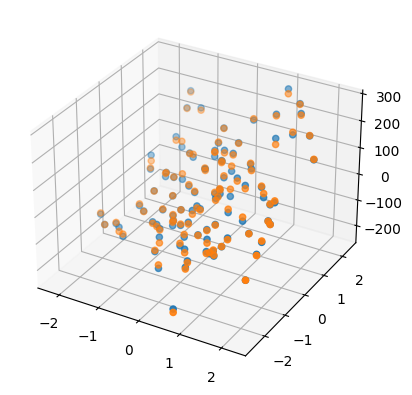

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)

2.6 Learning Curve

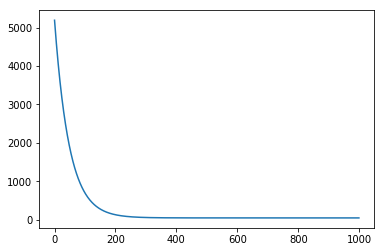

In [ ]:
plt.plot(range(n_iterations), cost_history)

## 2.7 Final Evaluation

In [ ]:
coef_determination(y, predictions)

0.9916687122229687